<a href="https://colab.research.google.com/github/popitree/python/blob/master/Ascii_Art_Rabindranath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from PIL import Image, ImageDraw, ImageFont
import random
import numpy as np
import requests
from io import BytesIO

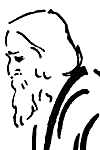

In [2]:
img_address = "https://satyajitray.org/wp-content/uploads/2019/12/tagore_by_satyajit.gif"
font_address = "https://github.com/suman51284/Mina/blob/master/FONTS/ttf/Mina-Regular.ttf?raw=true"
my_font_bytes = BytesIO(requests.get(font_address).content)
img = Image.open(BytesIO(requests.get(img_address).content))
img = img.crop((0,0,100,150))
img

In [3]:
img_arr = np.array(img)
img_arr.shape

(150, 100)

In [4]:
np.place(img_arr, img_arr > 0, [1])
img_lst = img_arr.tolist()
np.sum(img_arr)

2878

In [0]:
text_arr = ["স","কা","ত","ের","ও","ই","কাঁ", "িদ"," েছ", 
          "স","ক","েল","েশা","েনা","েশা","েনা","িপ","তা",
          "ক","েহা","কা","েন","কা","েন","শু","না","ও","প্রা",
          "েণ","প্রা","েণ","ম","ঙ্গ","ল","বা","র","তা",
            "---","ন","য়","ন","েতা","মা","ের","পা","য়","না","েদ","িখ","েত",
            "র","েয়","ছ","ন","য়","েন","ন","য়","েন",
            "হৃ","দ","য়","েতা","মা","ের","পা","য়","না","জা","িন","েত",
            "হৃ","দ","েয়","র","েয়","ছ","েগা","প","েন"
           "---","মা","েঝ","মা","েঝ","ত","ব","েদ","খা","পা","ই",
            "িচ","র","িদ","ন","েক","ন","পা","ই","না",
            "েক","ন","েম","ঘ","আ","েস","হৃ","দ","য়","আ","কা","েশ",
            "েতা","মা","ের","েদ","িখ","েত","েদ ","য়","না",
            "েমা","হ","েম","েঘ","েতা","মা","ের","েদ","িখ","েত","েদ","য়","না",
            "অ","ন্ধ","ক","ের","রা","েখ","েতা","মা","ের","েদ","িখ","িত","েদ","য়","না"]
text_arr_len = len(text_arr)
color_palette = [(5, 0, 0), (15, 0, 0), (0, 0, 15),(0, 0, 5)]            

In [0]:
font = ImageFont.truetype (my_font_bytes, 15)

In [0]:
blank_image = Image.new('RGB', (20, 20),(0,0,0))
text_img_arr = []
for i in text_arr:
    img1 = Image.new('RGB', (20, 20),color_palette[random.randint(0,3)])
    #font = ImageFont.truetype (my_font_bytes.read(), 15)
    d = ImageDraw.Draw(img1)
    if len(i) == 1:
        xy = (2,-2)
    else:
        xy = (0,-2)
    d.text(xy, i, fill=(255, 255, 255), font=font)
    text_img_arr.append(img1)
def get_concat_h(im1, im2):
    if im1 == None:
        return im2
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst
def get_concat_v(im1, im2):
    if im1 == None:
        return im2
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

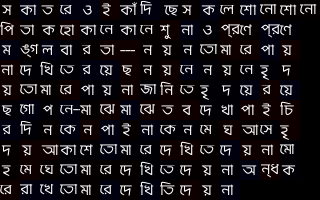

In [8]:
combined_img = None
cnt = 0
strips = []
for text_img in text_img_arr:
    combined_img = get_concat_h(combined_img, text_img)
    if cnt > 0 and cnt % 15 == 0:
        strips.append(combined_img)
        combined_img = None
    cnt += 1
strips.append(combined_img)
combined_img = None
for strip in strips:
    combined_img = get_concat_v(combined_img, strip)
combined_img

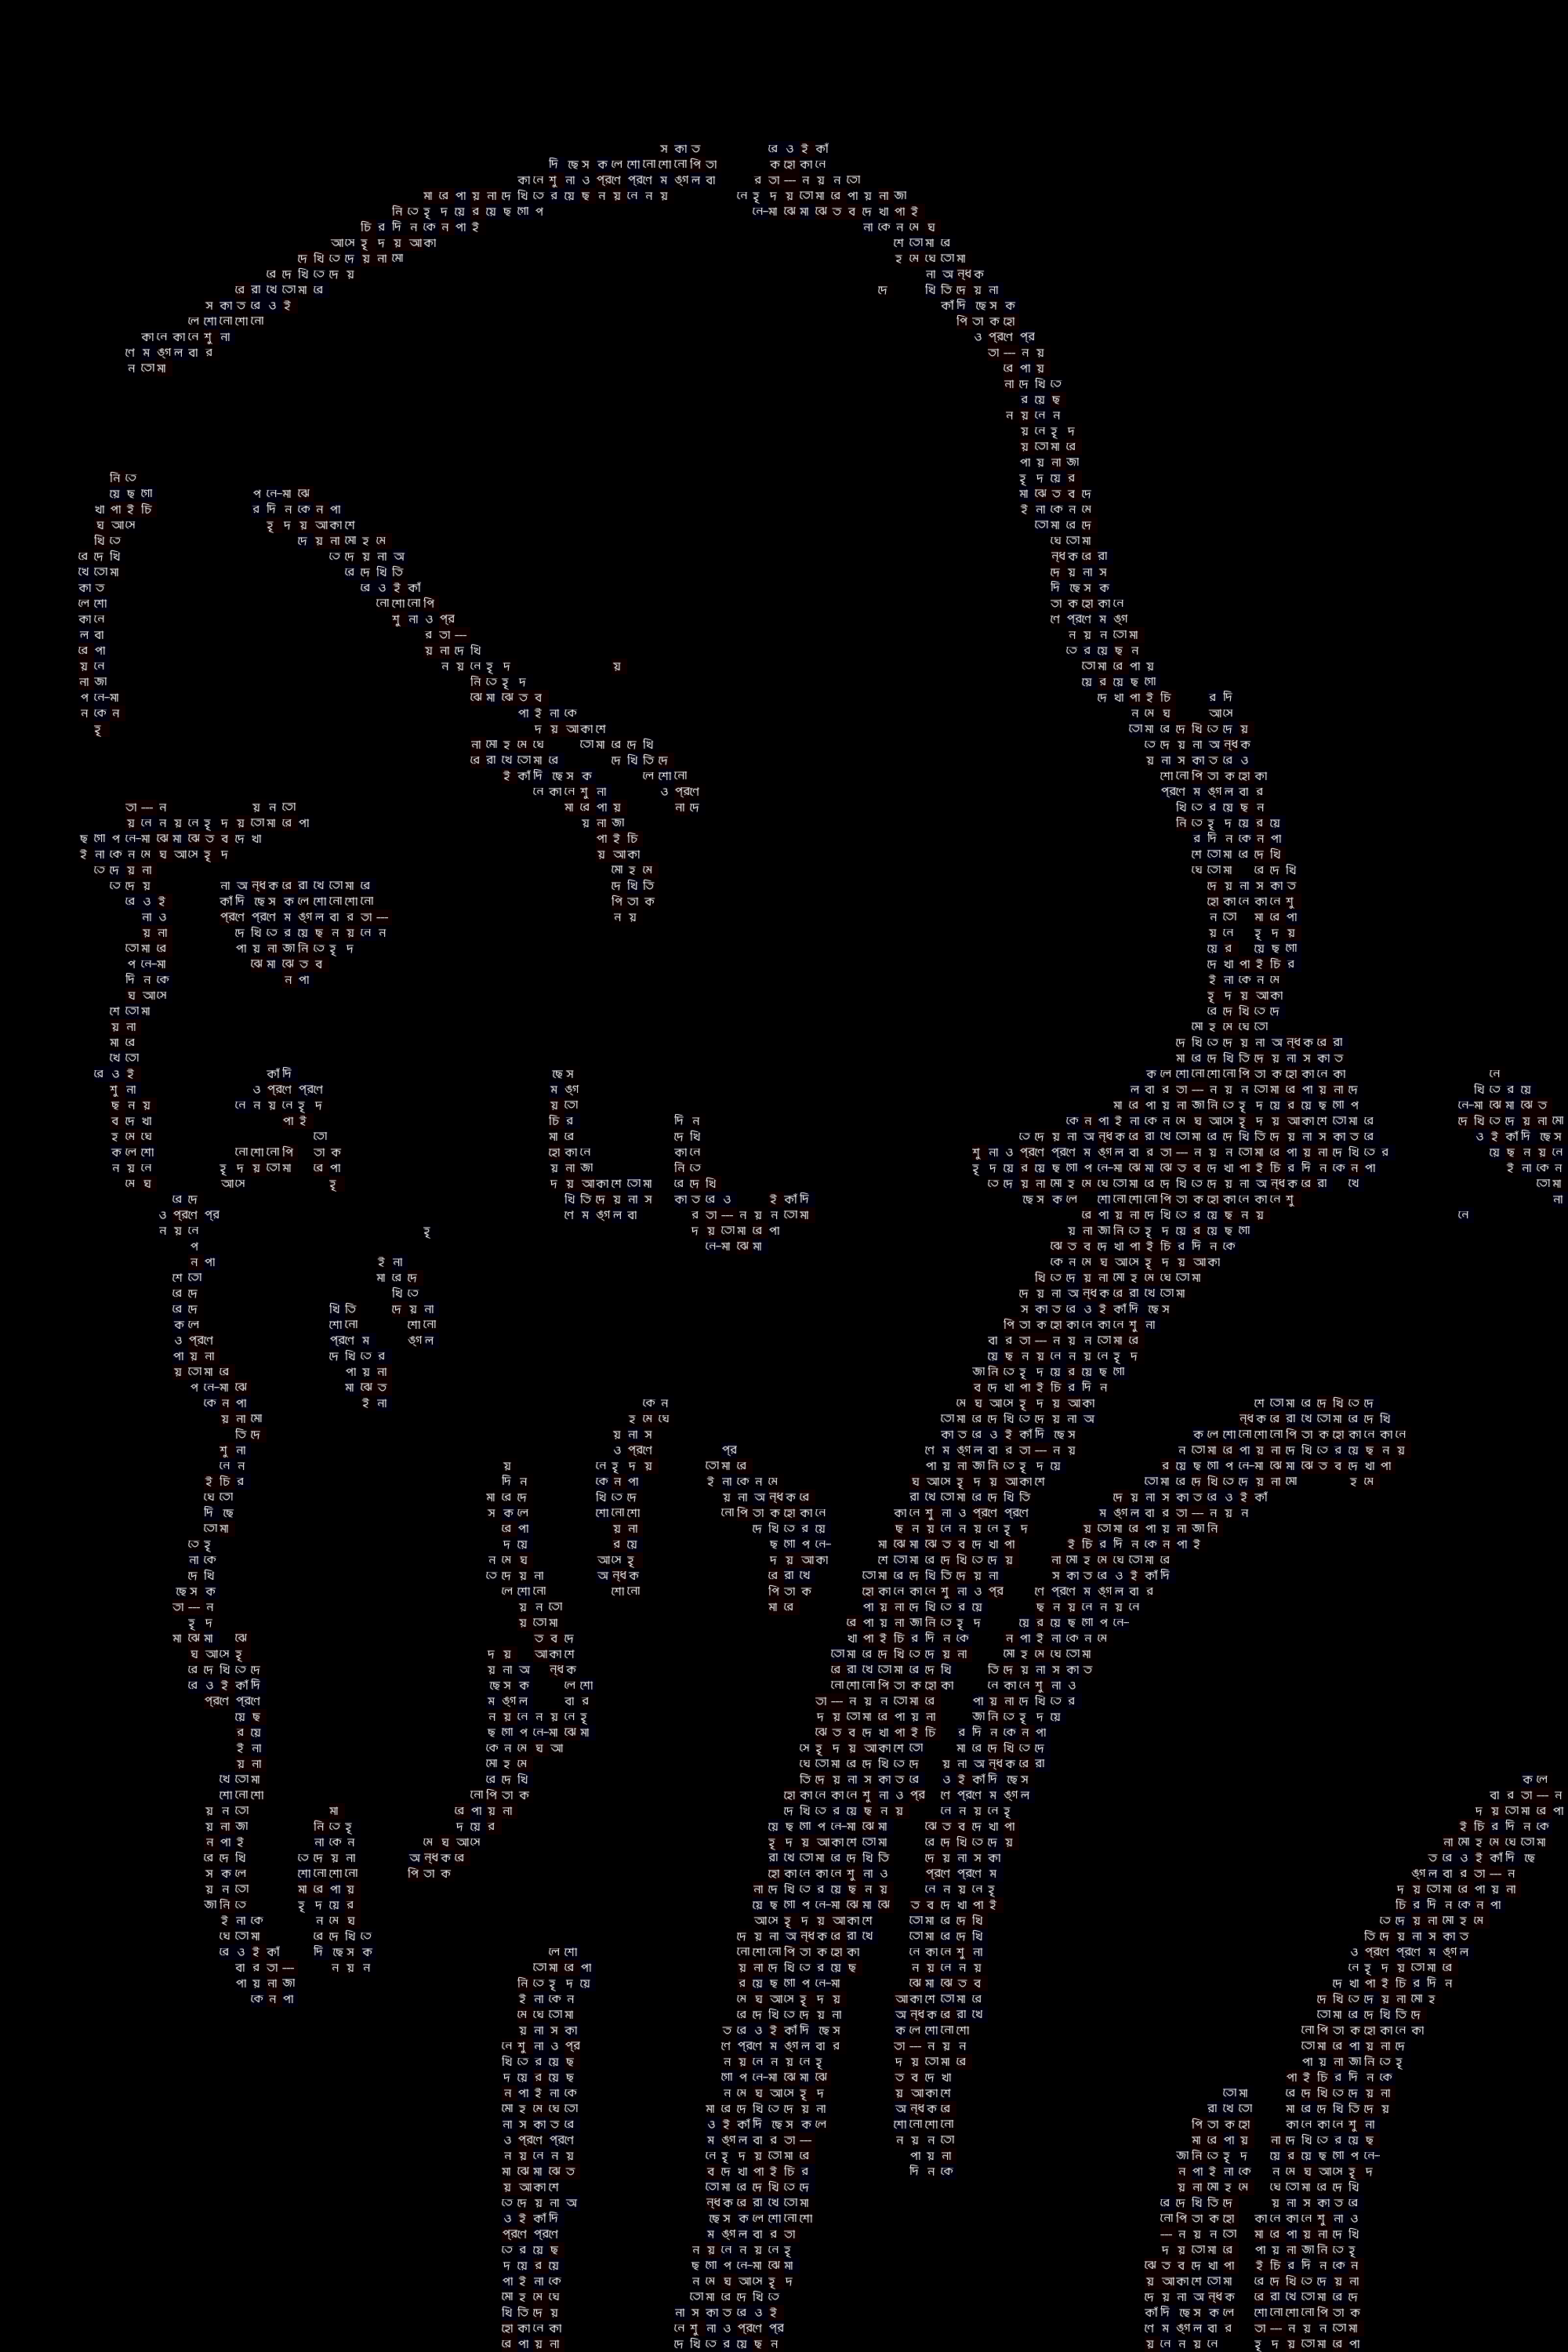

In [9]:

image_horizontal_strips = []
cnt = 0
for inner_lst in img_lst:
    
    image_strip = None
    for idx,num in enumerate(inner_lst):
        if num == 0:
            img = blank_image
        else:
            img = text_img_arr[cnt%text_arr_len]
            cnt += 1  
        image_strip = get_concat_h(image_strip,img)
          
    image_horizontal_strips.append(image_strip)
final_image = None
for i in range(len(image_horizontal_strips)):
    final_image = get_concat_v(final_image,image_horizontal_strips[i])
final_image
        